In [1]:
import os
import tarfile
import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
%matplotlib inline 
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [7]:
housing = load_housing_data()
housing.name = "California Housing"

In [8]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119f84e90>,
      dtype=object)

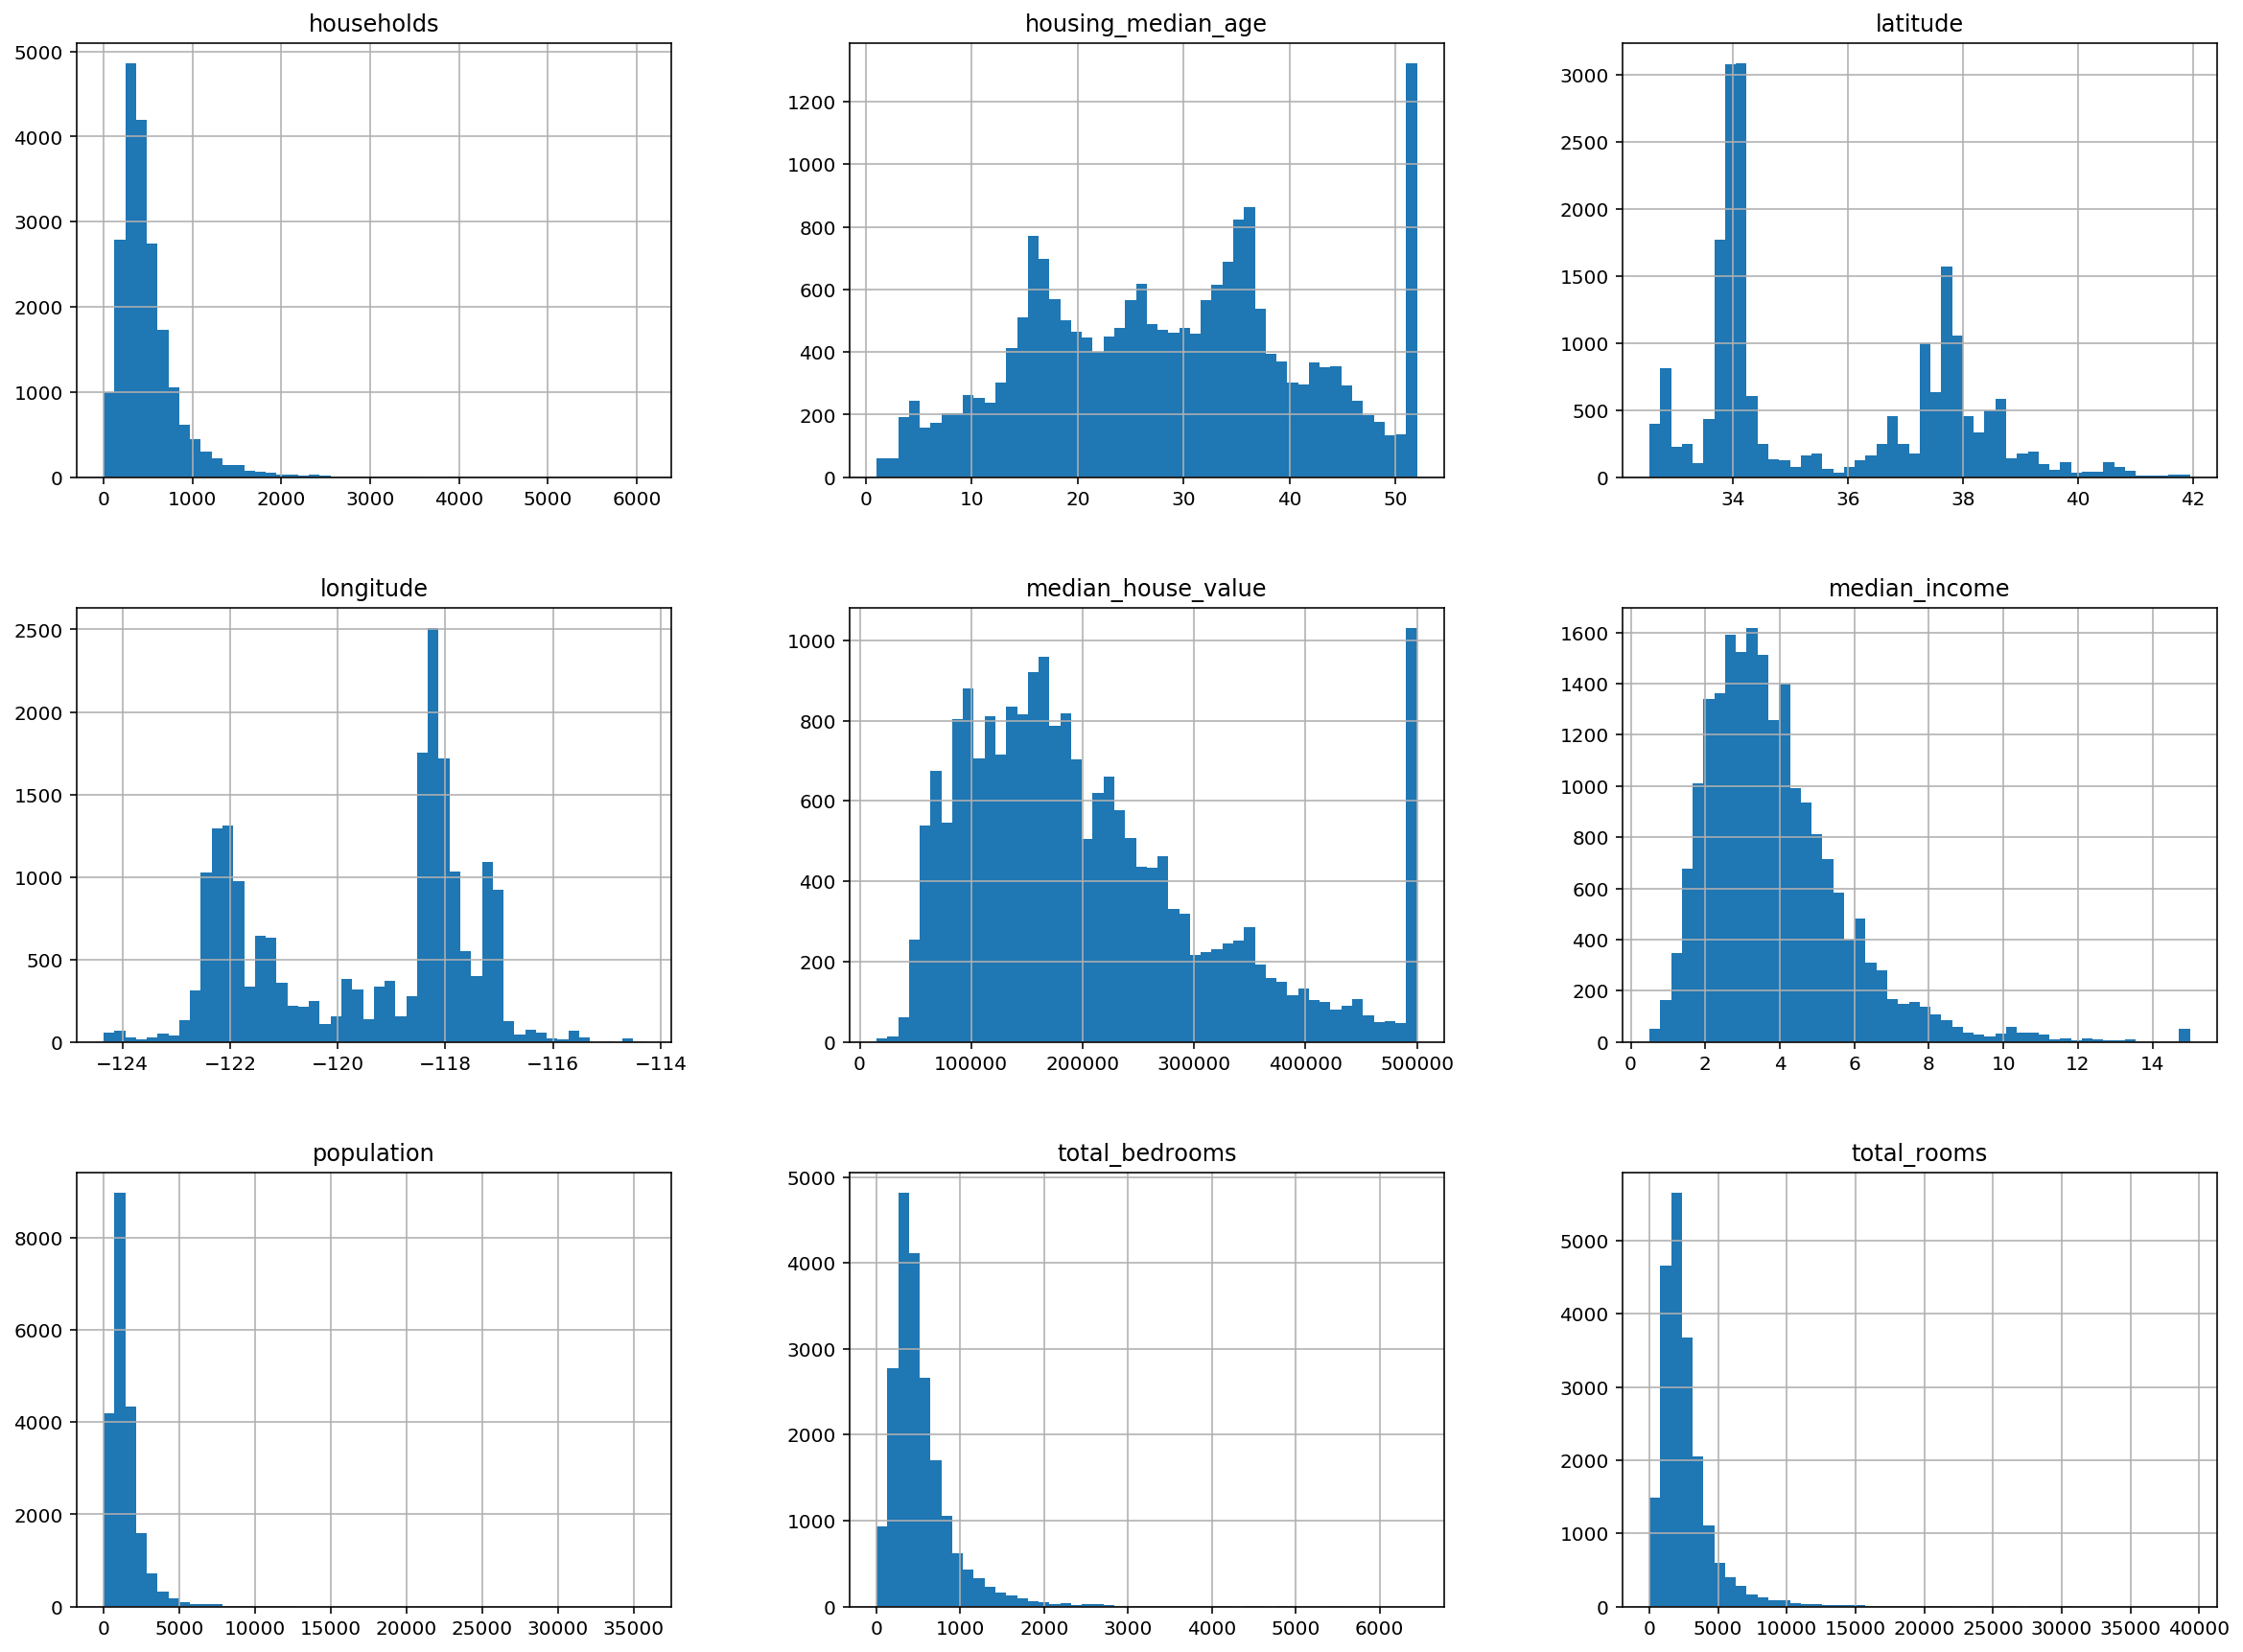

In [12]:
housing.hist(bins=50, figsize=(20,15))

In [13]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [14]:
train_set, test_indices = split_train_test(housing, 1 / 5)

In [15]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_set_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [16]:
housing_with_id = housing.reset_index()

In [17]:
train_set, test_set = split_train_set_by_id(housing_with_id, 1 / 5, "index")

In [18]:
len(train_set) / len(housing)

0.8

In [19]:
housing_with_id["id"] = housing_with_id.longitude * 1000 + housing_with_id.latitude
train_set, test_set = split_train_set_by_id(housing_with_id, 1 / 5, "id")

In [20]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [21]:
housing["income_cat"] = pd.cut(housing.median_income,
                              bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf],
                              labels=[1, 2, 3, 4, 5])

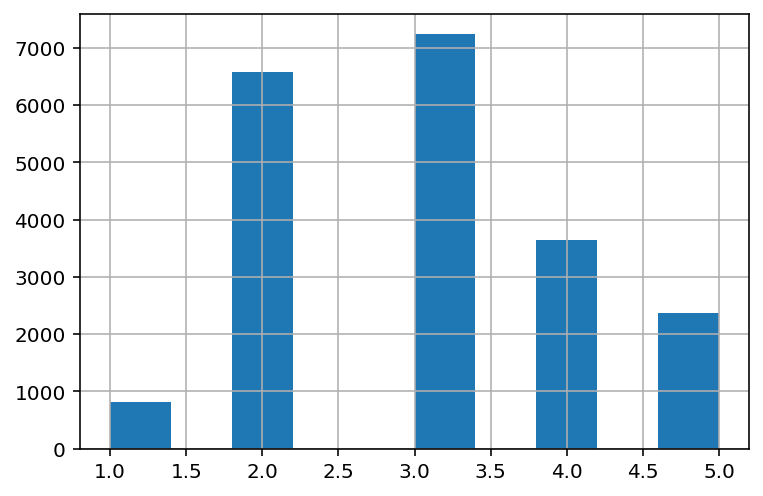

In [22]:
housing.income_cat.hist()

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [24]:
for train_index, test_index in split.split(housing, housing.income_cat):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [25]:
strat_test_set.income_cat.value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [26]:
for set_ in strat_train_set, strat_test_set:
    set_.drop("income_cat", axis=1, inplace=True)

In [27]:
# Explore data -------------------------------------------

In [28]:
housing = strat_test_set.copy()

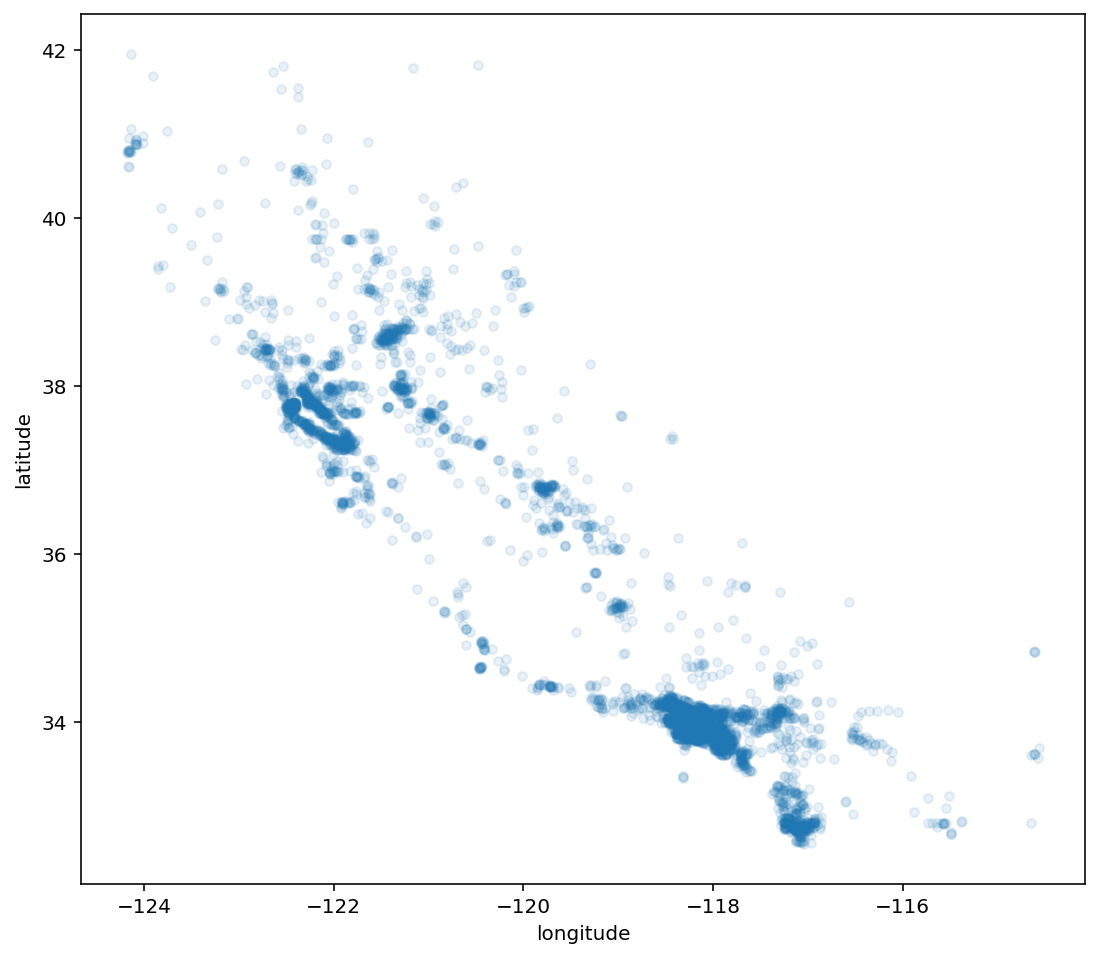

In [29]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1, figsize=(9, 8))

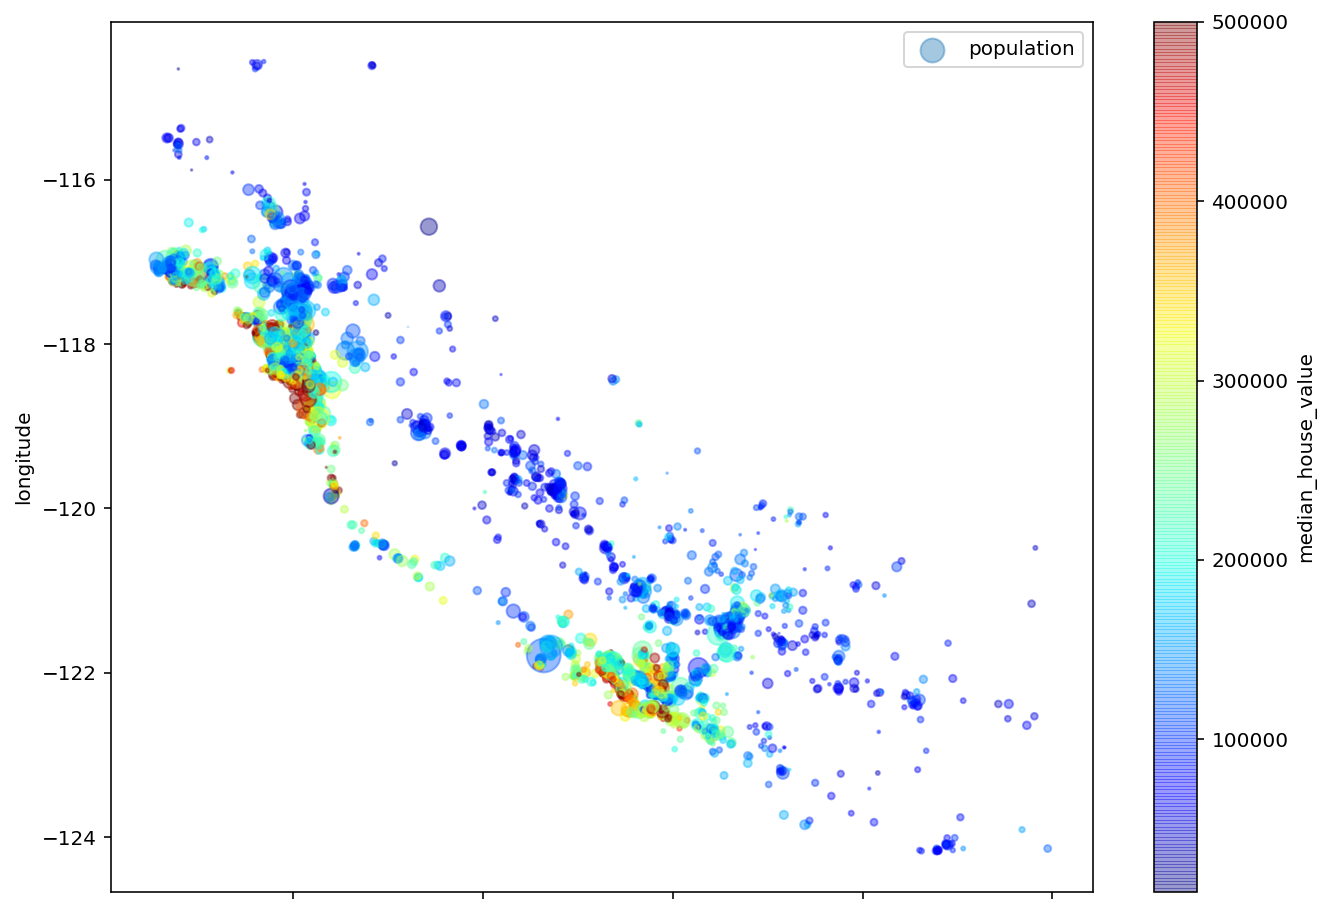

In [30]:
housing.plot(kind='scatter', x='latitude', y='longitude', alpha=0.4,
            s=housing.population/100, label='population', figsize=(11, 8),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

In [31]:
corr_matrix = housing.corr()

In [32]:
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691831
total_rooms           0.131435
housing_median_age    0.071357
households            0.071242
total_bedrooms        0.057568
population           -0.016033
longitude            -0.039987
latitude             -0.150124
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f59bdd0>,
      dtype=object)

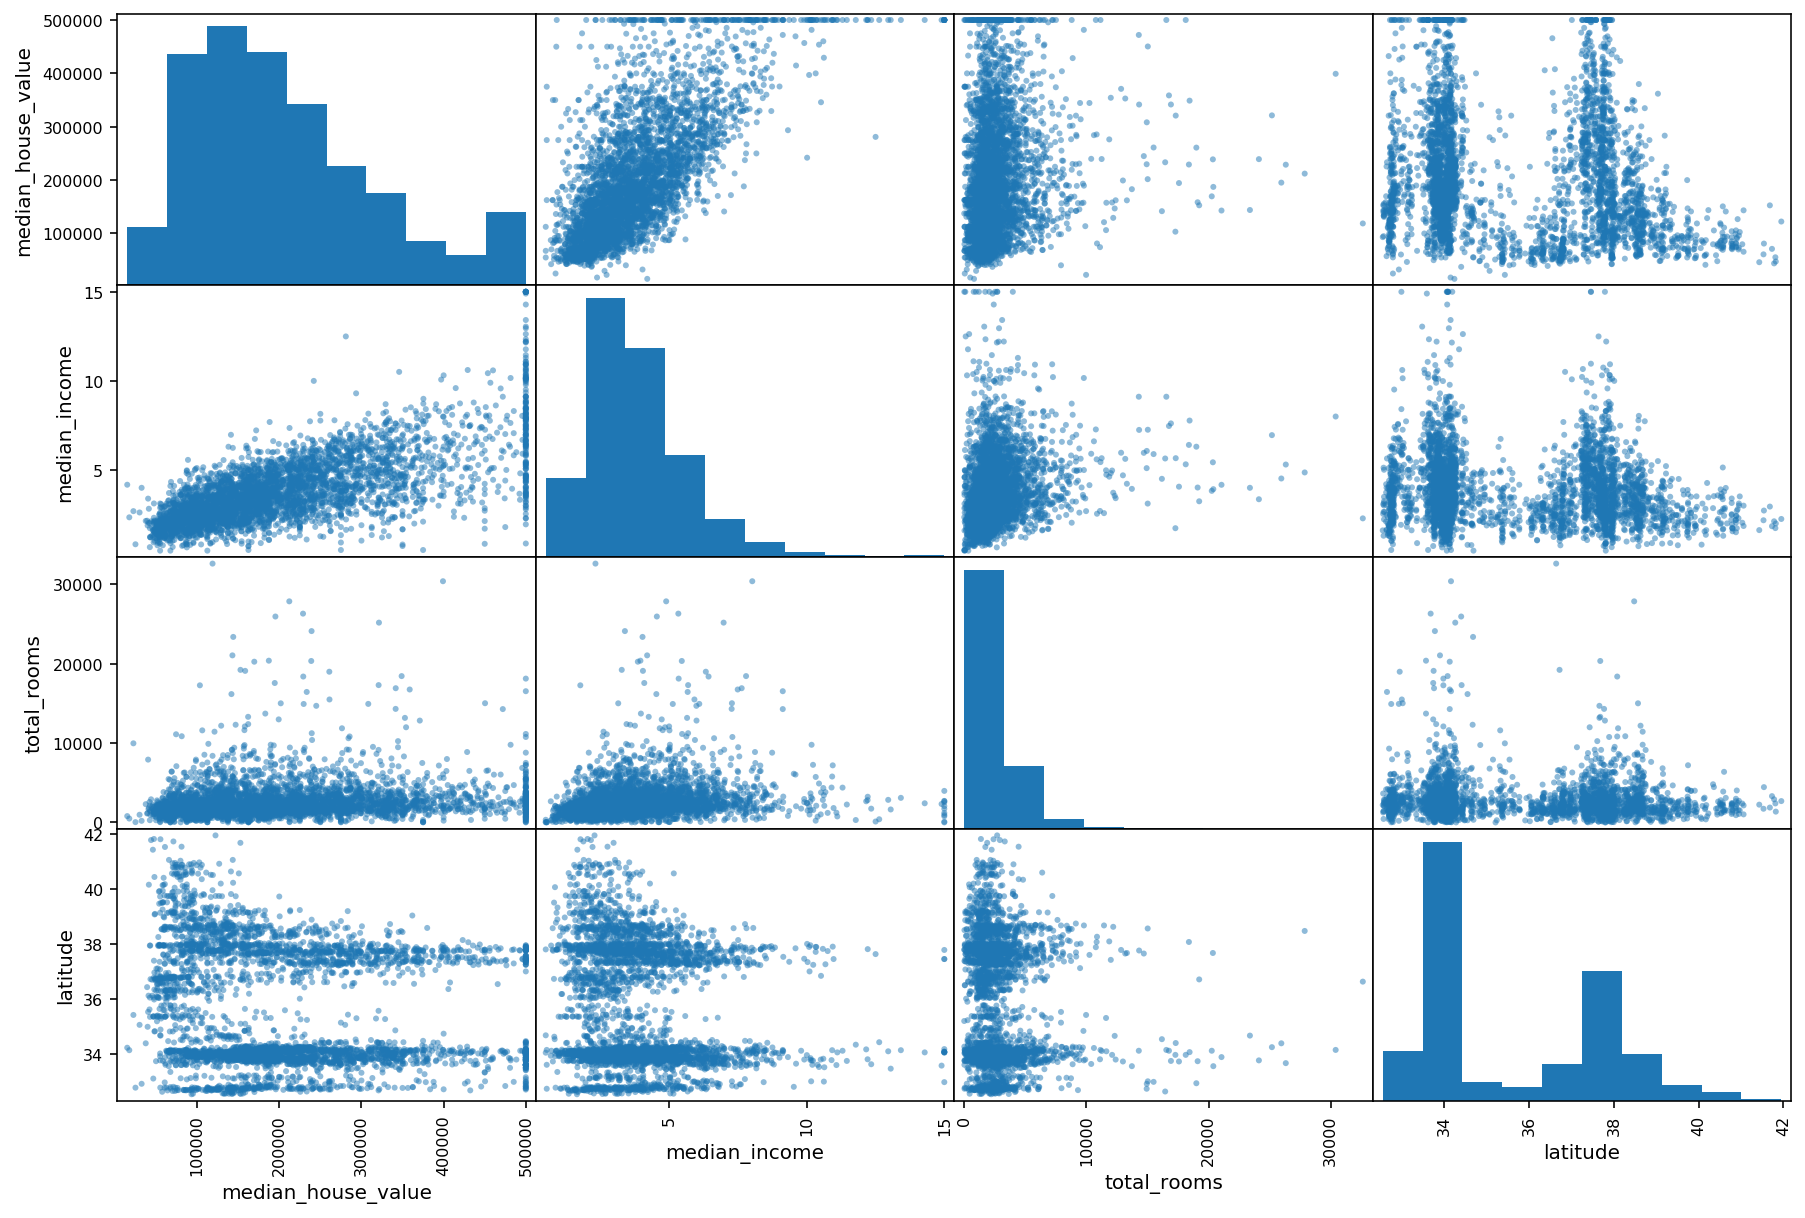

In [33]:
from pandas.plotting import scatter_matrix

attributes=['median_house_value', 'median_income', 'total_rooms', 'latitude']
scatter_matrix(housing[attributes], figsize=(15, 10))

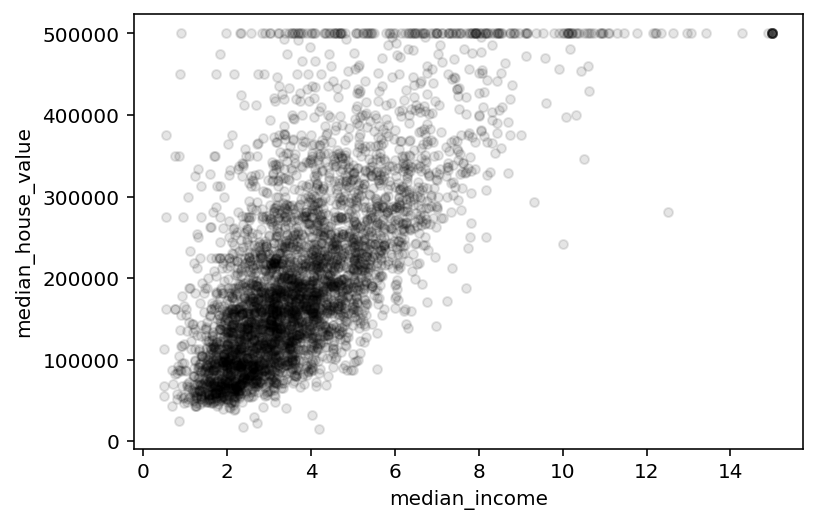

In [34]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1, color='black')

In [35]:
housing["rooms_per_household"] = housing.total_rooms / housing.households
housing["bedrooms_per_room"] = housing.total_bedrooms / housing.total_rooms
housing["population_per_household"] = housing.population / housing.households

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20f307d0>,
      dtype=object)

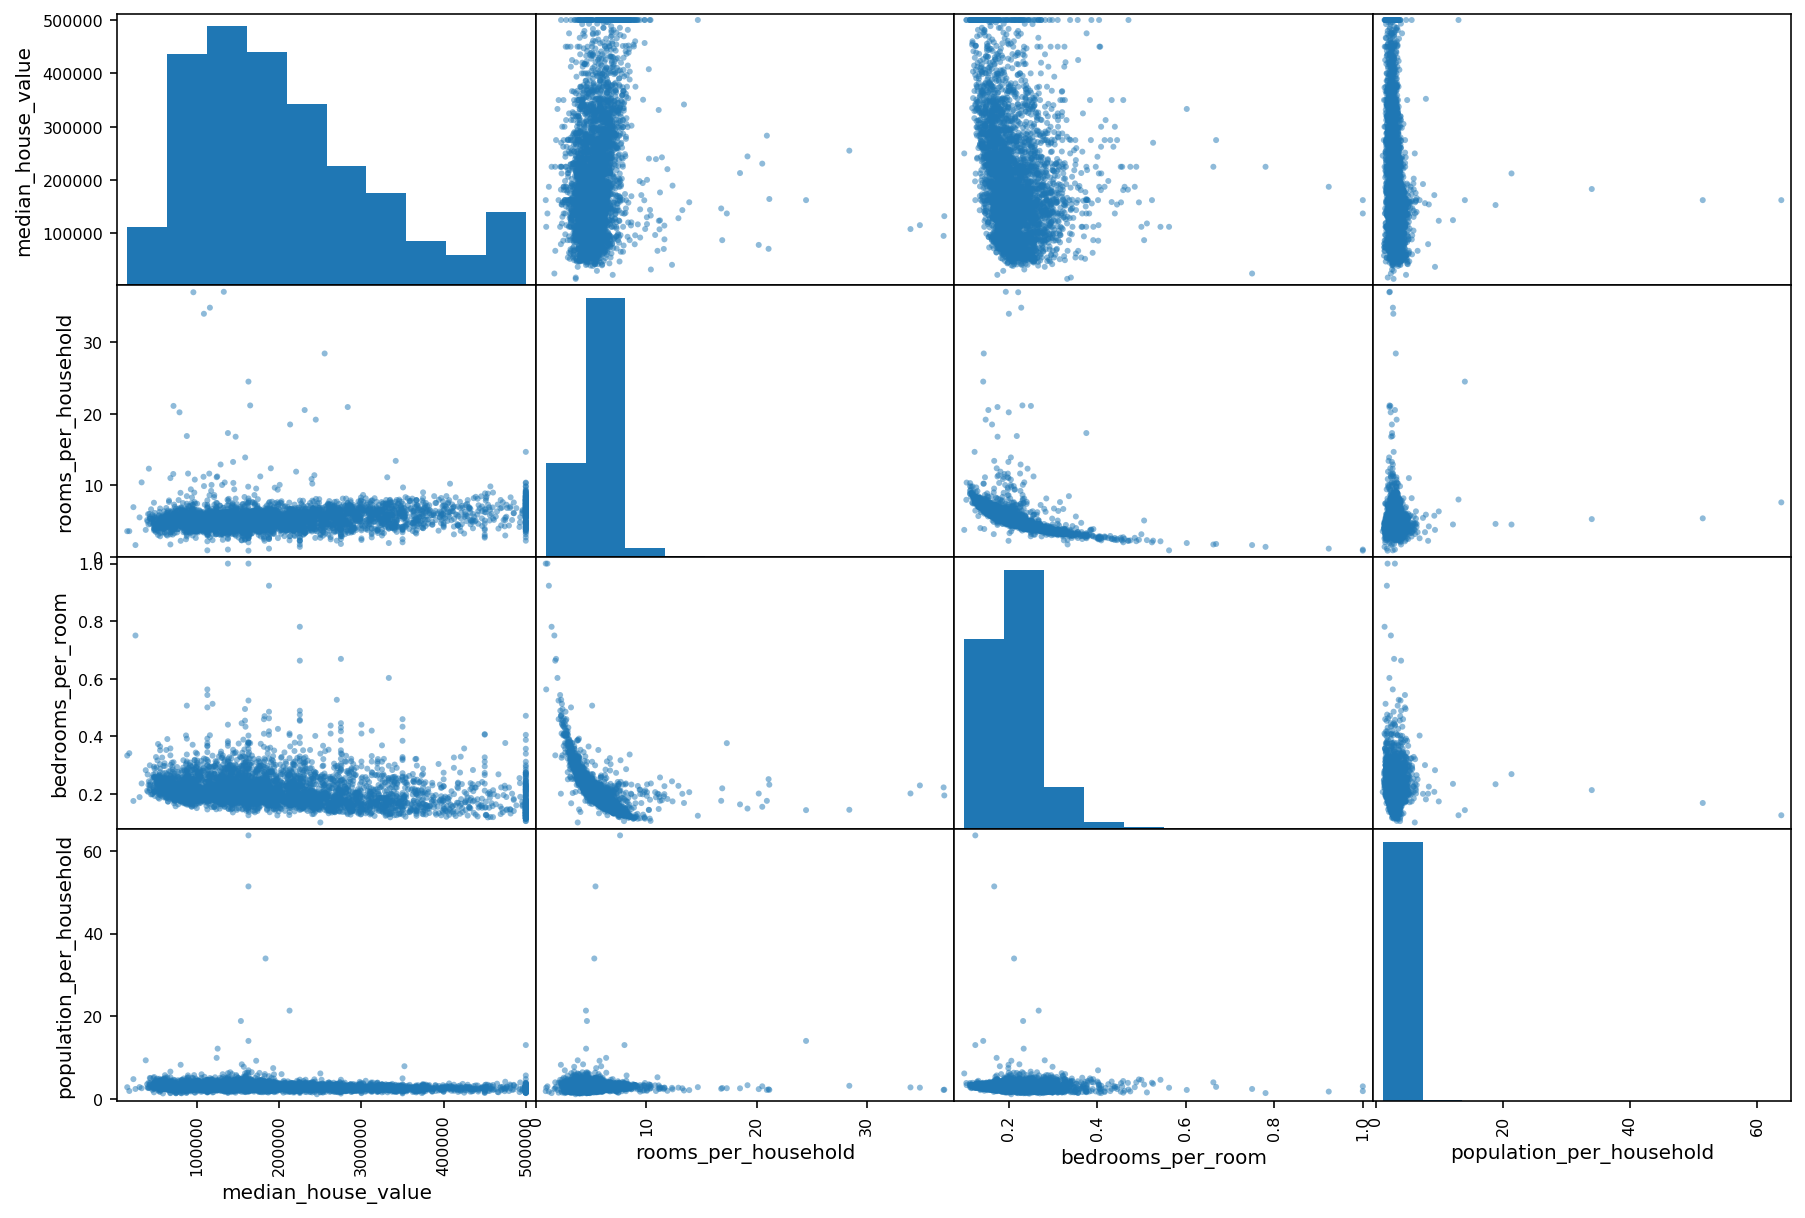

In [36]:
corr_matrix = housing.corr()
corr_matrix.median_house_value.sort_values(ascending=False)

attributes = ['median_house_value', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']
scatter_matrix(housing[attributes], figsize=(15, 10))

In [37]:
housing_labels = strat_train_set.median_house_value.copy()
housing = strat_train_set.drop('median_house_value', axis=1)

In [38]:
#median = housing.total_bedrooms.median()
#housing.total_bedrooms.fillna(median, inplace=True)

In [39]:
#or

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis=1)

X = imputer.fit_transform(housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [40]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [41]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [42]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [43]:
from sklearn.preprocessing import OneHotEncoder
cat_1hot_encoder = OneHotEncoder()

In [44]:
housing_cat_1hot = cat_1hot_encoder.fit_transform(housing_cat) 
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [45]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [46]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
new_columns = pd.Index(['rooms_per_household','population_per_household'])

In [47]:
housing_extra_attrs = attr_adder.fit_transform(housing.values)
pd.DataFrame(housing_extra_attrs, index=housing.index, columns=housing.columns.append(new_columns))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785
...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.2,46,1271,236,573,210,4.9312,INLAND,6.05238,2.72857
12053,-117.56,33.88,40,1196,294,1052,258,2.0682,INLAND,4.63566,4.07752
13908,-116.4,34.09,9,4855,872,2098,765,3.2723,INLAND,6.34641,2.74248
11159,-118.01,33.82,31,1960,380,1356,356,4.0625,<1H OCEAN,5.50562,3.80899


In [48]:
# pipeline

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attr_adder', CombinedAttributesAdder(add_bedrooms_per_room=False)),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
pd.DataFrame(housing_num_tr, index=housing_num.index, columns=housing_num.columns.append(new_columns))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household
17606,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,-0.086499
18632,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.033534
14650,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,-0.092405
3230,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,0.089736
3555,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,-0.004194
...,...,...,...,...,...,...,...,...,...,...
6563,0.722267,-0.673331,1.379547,-0.632123,-0.725361,-0.759010,-0.764049,0.554158,0.234352,-0.031755
12053,1.007011,-0.823004,0.902385,-0.667196,-0.584183,-0.329664,-0.636291,-0.948815,-0.308114,0.084689
13908,1.586489,-0.724781,-1.562952,1.043901,0.822735,0.607904,0.713156,-0.316705,0.346934,-0.030554
11159,0.782213,-0.851068,0.186642,-0.309919,-0.374849,-0.057178,-0.375451,0.098121,0.024995,0.061509


In [50]:
# ColumnTransformer

In [51]:
from sklearn.compose import ColumnTransformer

num_attrs = list(housing_num)
cat_attrs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attrs),
    ('cat', OneHotEncoder(), cat_attrs),
], remainder='passthrough')

housing_prepared = full_pipeline.fit_transform(housing)

In [52]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [211888.26540421 321274.25149998 210853.46010112  62261.10820843
 194921.76527689]


In [54]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [55]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [56]:
lin_rmse

68911.7605423384

In [57]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_mse

0.0

In [58]:
# Decision tree cross-validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rsme_scores = np.sqrt(-scores)
tree_rsme_scores

array([70370.08652231, 67946.69301331, 67855.34700504, 69843.89237722,
       70239.88665774, 73183.85412167, 72655.67557829, 71106.8147651 ,
       76358.30394994, 68935.51132782])

In [59]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rsme_scores)

Scores: [70370.08652231 67946.69301331 67855.34700504 69843.89237722
 70239.88665774 73183.85412167 72655.67557829 71106.8147651
 76358.30394994 68935.51132782]
Mean: 70849.60653184276
Standard deviation: 2485.7979949261


In [60]:
# Linear regression cross-validation
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores: [67461.9308165  67232.2484863  68224.22888082 74716.58955656
 68420.26897488 71610.91469695 65201.58349349 68686.9304607
 72262.5140762  68112.28697795]
Mean: 69192.94964203316
Standard deviation: 2674.1447265970132


In [61]:
# Random forest

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

forest_reg_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, forest_reg_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

/Users/pavlobohdan/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


22378.569402827223

In [62]:
# Random forest cross-validation
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [51442.59160883 49478.29464967 53280.3740418  53904.57210029
 52637.56142845 56547.9525767  51641.94443739 50450.46574674
 55314.23195425 52802.4726071 ]
Mean: 52750.046115122386
Standard deviation: 2038.5896091914171


In [63]:
import joblib
joblib.dump(forest_reg, "pickle/forest_reg_housing.pkl")

['pickle/forest_reg_housing.pkl']

In [64]:
# fine-tuning the model

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [66]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring="neg_mean_squared_error",
                          return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [67]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [68]:
cv_result = grid_search.cv_results_
for mean_score, params in zip(cv_result['mean_test_score'], cv_result['params']):
    print(np.sqrt(-mean_score), params)

63361.53958645067 {'max_features': 2, 'n_estimators': 3}
55544.88334698924 {'max_features': 2, 'n_estimators': 10}
52420.024936410606 {'max_features': 2, 'n_estimators': 30}
60514.96667162151 {'max_features': 4, 'n_estimators': 3}
52519.95487955484 {'max_features': 4, 'n_estimators': 10}
49982.01763595994 {'max_features': 4, 'n_estimators': 30}
57867.032875884426 {'max_features': 6, 'n_estimators': 3}
52012.8469151343 {'max_features': 6, 'n_estimators': 10}
49556.07487715804 {'max_features': 6, 'n_estimators': 30}
58361.61399148352 {'max_features': 8, 'n_estimators': 3}
51747.06002803367 {'max_features': 8, 'n_estimators': 10}
49767.20721033999 {'max_features': 8, 'n_estimators': 30}
61885.80181756291 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54260.102678148454 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59409.69390193421 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51839.419940884734 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [69]:
from sklearn.model_selection import RandomizedSearchCV

rand_search = RandomizedSearchCV(forest_reg, param_distributions={
    'bootstrap': [True, False],
    'n_estimators': np.logspace(1, 3, num=4, base=3, dtype=int),
    'max_features': range(2, 15, 2)
}, scoring="neg_mean_squared_error", n_iter=100, cv=5, error_score='raise')

rand_search.fit(housing_prepared, housing_labels)
rand_search.best_params_

/Users/pavlobohdan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 56 is smaller than n_iter=100. Running 56 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'n_estimators': 27, 'max_features': 6, 'bootstrap': False}

In [70]:
rand_cv_result = rand_search.cv_results_
score_to_params = list(zip(rand_cv_result['mean_test_score'], rand_cv_result['params']))
for mean_score, params in sorted(score_to_params, reverse=True):
    print(np.sqrt(-mean_score), params)

49053.91522536498 {'n_estimators': 27, 'max_features': 6, 'bootstrap': False}
49376.58593480685 {'n_estimators': 27, 'max_features': 4, 'bootstrap': False}
49384.37415440857 {'n_estimators': 27, 'max_features': 8, 'bootstrap': False}
49624.099468871864 {'n_estimators': 27, 'max_features': 6, 'bootstrap': True}
49858.841147471736 {'n_estimators': 27, 'max_features': 8, 'bootstrap': True}
50197.822641474675 {'n_estimators': 27, 'max_features': 10, 'bootstrap': True}
50269.377038611885 {'n_estimators': 12, 'max_features': 6, 'bootstrap': False}
50270.441139791394 {'n_estimators': 27, 'max_features': 4, 'bootstrap': True}
50429.794241287804 {'n_estimators': 27, 'max_features': 10, 'bootstrap': False}
50483.236585375715 {'n_estimators': 12, 'max_features': 8, 'bootstrap': False}
50698.682053834156 {'n_estimators': 27, 'max_features': 12, 'bootstrap': True}
50994.80875554251 {'n_estimators': 27, 'max_features': 14, 'bootstrap': True}
51024.80557857197 {'n_estimators': 12, 'max_features': 6, 

In [71]:
feature_importances = rand_search.best_estimator_.feature_importances_
feature_importances

array([9.10945499e-02, 8.25988942e-02, 4.20018325e-02, 2.04337225e-02,
       1.71567683e-02, 1.88744892e-02, 1.69449703e-02, 3.41181332e-01,
       8.24013243e-02, 1.06912801e-01, 8.87192845e-03, 1.61694983e-01,
       4.75521381e-05, 3.26889216e-03, 6.51596006e-03])

In [74]:
extra_attrs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attrs = list(cat_encoder.categories_[0])

attrs = num_attrs + extra_attrs + cat_one_hot_attrs

sorted(zip(feature_importances, attrs), reverse=True)

[(0.3411813319994633, 'median_income'),
 (0.16169498335036556, '<1H OCEAN'),
 (0.10691280058229406, 'pop_per_hhold'),
 (0.09109454993388744, 'longitude'),
 (0.08259889419003787, 'latitude'),
 (0.08240132432455836, 'rooms_per_hhold'),
 (0.042001832489336005, 'housing_median_age'),
 (0.0204337225432571, 'total_rooms'),
 (0.018874489163851597, 'population'),
 (0.017156768275364814, 'total_bedrooms'),
 (0.016944970343195587, 'households'),
 (0.00887192844704143, 'bedrooms_per_room'),
 (0.006515960063680455, 'NEAR BAY'),
 (0.0032688921555786158, 'ISLAND'),
 (4.755213808787575e-05, 'INLAND')]

In [75]:
rand_search.best_params_

{'n_estimators': 27, 'max_features': 6, 'bootstrap': False}

In [76]:
final_model = rand_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set.median_house_value.copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

46474.40228261537

In [110]:
from scipy import stats

confidence = 0.95

squared_errors = (final_predictions - y_test) ** 2

np.sqrt(stats.t.interval(confidence, 1000000000000000000, 
        loc=squared_errors.mean(), 
        scale=stats.sem(squared_errors)))

array([44495.71735045, 48372.21591494])